In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [10]:
df = pd.read_csv('/Users/evolve/Downloads/WineQuality 2.csv')
print("Successfully Imported Data")
print(df.head())
print(df.describe())
print(df.info())

Successfully Imported Data
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4             0.170         0.29             1.4      0.047   
1            5.3             0.310         0.38            10.5      0.031   
2            4.7             0.145         0.29             1.0      0.042   
3            6.9             0.260         0.29             4.2      0.043   
4            6.4             0.450         0.07             1.1      0.030   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 23.0                 107.0  0.99390  3.52       0.65   
1                 53.0                 140.0  0.99321  3.34       0.46   
2                 35.0                  90.0  0.99080  3.76       0.49   
3                 33.0                 114.0  0.99020  3.16       0.31   
4                 10.0                 131.0  0.99050  2.97       0.28   

   alcohol  quality  
0     10.4        6  
1     11.7     

<function matplotlib.pyplot.show(close=None, block=None)>

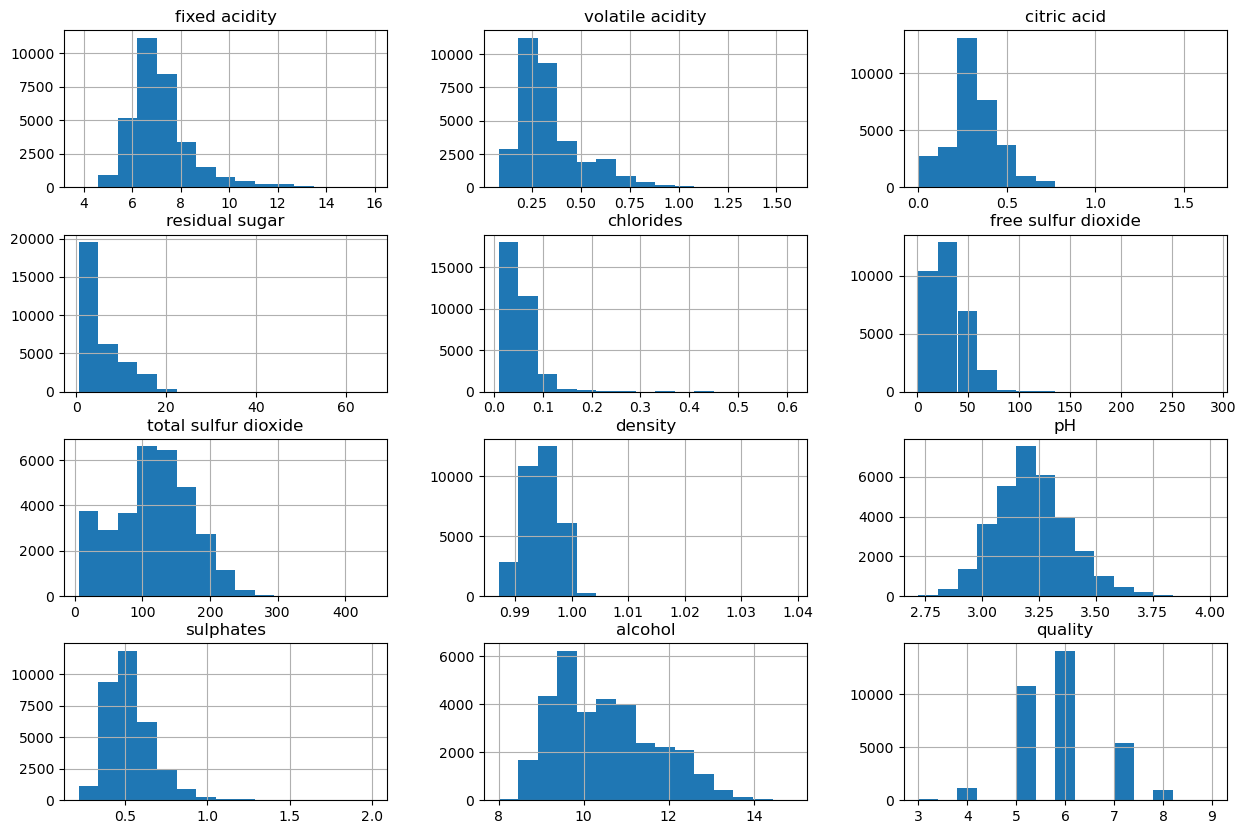

In [11]:
df.hist(bins=15, figsize=(15, 10))
plt.show

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='quality', ylabel='Density'>

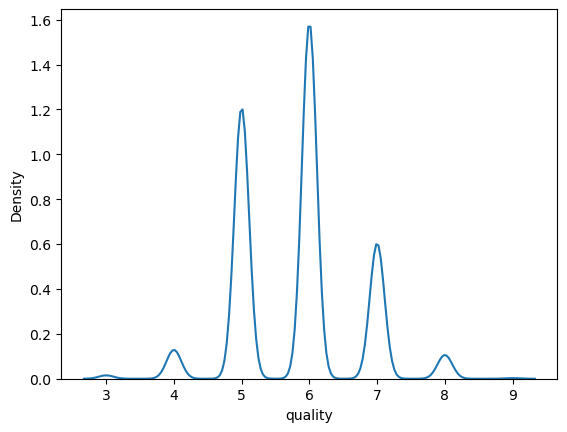

In [12]:
sb.kdeplot(df.query('quality > 2').quality)

fixed acidity              Axes(0.125,0.712609;0.168478x0.167391)
volatile acidity        Axes(0.327174,0.712609;0.168478x0.167391)
citric acid             Axes(0.529348,0.712609;0.168478x0.167391)
residual sugar          Axes(0.731522,0.712609;0.168478x0.167391)
chlorides                  Axes(0.125,0.511739;0.168478x0.167391)
free sulfur dioxide     Axes(0.327174,0.511739;0.168478x0.167391)
total sulfur dioxide    Axes(0.529348,0.511739;0.168478x0.167391)
density                 Axes(0.731522,0.511739;0.168478x0.167391)
pH                          Axes(0.125,0.31087;0.168478x0.167391)
sulphates                Axes(0.327174,0.31087;0.168478x0.167391)
alcohol                  Axes(0.529348,0.31087;0.168478x0.167391)
quality                  Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

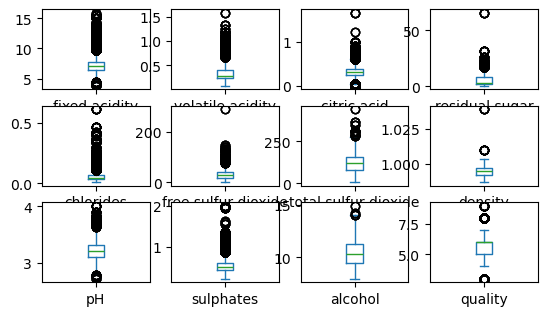

In [13]:
df.plot(kind='box', subplots= True, layout=(4,4), sharex= False)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on the test: {mse}')

Mean Squared Error on the test: 0.5287410136625922


In [ ]:
def predict_wine_quality(new_data):
    if type(new_data[0]) is not list:
        new_data = [new_data]
    return model.predict(new_data)

def get_user_input_and_predict():
    features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
    user_input = []
    for feature in features:
        value = float(input(f'Enter {feature}:'))
        user_input.append(value)

    prediction = predict_wine_quality(user_input)
    print(f'The predicted quality of the wine is: {prediction}')

get_user_input_and_predict()